In [27]:
from Analysis.tfcrig.analysis import extract_features_from_session_data, get_mouse_ids_from_file_name, datetime_to_session_id, get_datetime_from_file_path
import Analysis.tfcrig
import pandas as pd

full_file = 'Software/Serial_read/data/m_1_2024-07-05_11-28-25.json'
file_name = full_file.split("/")[-1]
mouse_ids = get_mouse_ids_from_file_name(file_name)

for mouse_id in mouse_ids:
    session_id = datetime_to_session_id(get_datetime_from_file_path(file_name))
    data = pd.read_json(full_file)['data'][mouse_id]
    # data

    df = extract_features_from_session_data(
                raw_data=data,
                mouse_id=mouse_id,
                session_id=session_id,
                file_name=file_name,
                print_bad_data_blobs=False,
            )

ModuleNotFoundError: No module named 'tfcrig'

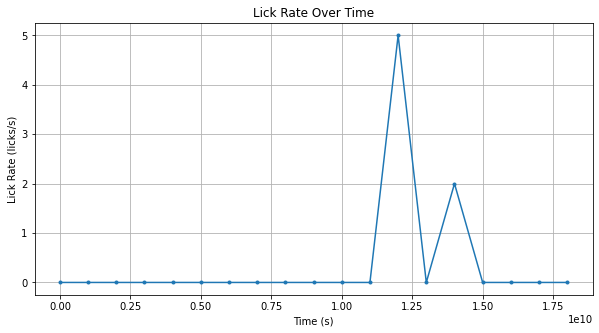

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

full_file = 'Software\Serial_read\data\m_23_2024-07-12_20-15-49.json'
mouse_id = 'm_23'
data = pd.read_json(full_file)['data'][mouse_id]
df = pd.DataFrame(data)
df['absolute_time'] = pd.to_datetime(df['absolute_time'], format='%Y-%m-%d_%H-%M-%S.%f')
df['elapsed_time'] = (df['absolute_time'] - df['absolute_time'].min()).dt.total_seconds().astype('int')
all_times = pd.date_range(df['absolute_time'].min(), df['absolute_time'].max(), freq='S')
all_df = pd.DataFrame(index=all_times)
# Merge with original data to include all timestamps and licks
merged_df = pd.merge_asof(all_df, df[['absolute_time', 'elapsed_time', 'message']], left_index=True, right_on='absolute_time', direction='nearest')

merged_df['lick'] = merged_df['message'].apply(lambda x: 'Lick' in x)
merged_df.set_index(pd.to_timedelta(merged_df['elapsed_time'], unit='s'), inplace=True)
lick_rate = merged_df['lick'].resample('S').sum().fillna(0)


# df['lick'] = df['message'].apply(lambda x: 'Lick' in x)
# lick_df = df[df['lick']]

# lick_df.set_index(pd.to_timedelta(lick_df['elapsed_time'], unit='s'), inplace=True)
# lick_df

# lick_rate = lick_df['lick'].resample('S').sum()

# lick_rate

plt.figure(figsize=(10, 5))
plt.plot(lick_rate.index, lick_rate.values, marker='.', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Lick Rate (licks/s)')
plt.title('Lick Rate Over Time')
plt.grid(True)


In [57]:
lick_rate

elapsed_time
0 days 00:00:00    0
0 days 00:00:01    0
0 days 00:00:02    0
0 days 00:00:03    0
0 days 00:00:04    0
0 days 00:00:05    0
0 days 00:00:06    0
0 days 00:00:07    0
0 days 00:00:08    0
0 days 00:00:09    0
0 days 00:00:10    0
0 days 00:00:11    0
0 days 00:00:12    5
0 days 00:00:13    0
0 days 00:00:14    2
0 days 00:00:15    0
0 days 00:00:16    0
0 days 00:00:17    0
0 days 00:00:18    0
Freq: S, Name: lick, dtype: int64

In [3]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

# Create a simple plot with 2 dots
figure = Figure()
canvas = FigureCanvas(figure)
canvas.setFixedSize(750, 400)
ax = figure.add_subplot(111)
ax.plot([1, 2], [3, 4], 'o')  # Two points at (1,3) and (2,4)

# Set labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Simple Plot with 2 Dots")
ax.grid(True)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Lick rate (licks/s)")
ax.set_title("Licks Over Time")

# Save the figure
figure.savefig("plot3.png")
